In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base_url = "C:/Users/M E L S A/Desktop/M E L S A/covid/data/"
covid_dataset_url = base_url + "WHO-COVID-19-global-data.csv"

In [3]:
df = pd.read_csv(covid_dataset_url) #url yi oku ve DataFrame objesine ata
df.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0
5,2020-02-09,AF,Afghanistan,EMRO,0,0,0,0
6,2020-02-16,AF,Afghanistan,EMRO,0,0,0,0
7,2020-02-23,AF,Afghanistan,EMRO,0,0,0,0
8,2020-03-01,AF,Afghanistan,EMRO,1,1,0,0
9,2020-03-08,AF,Afghanistan,EMRO,0,1,0,0


##### Eksik Verilerin Silinmesi ve Doldurulması

In [5]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Date_reported           0
Country_code         1463
Country              1254
WHO_region           5016
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [6]:
# Country_code, Country ve WHO_region ortak eksik olan satırları sil
df.dropna(subset=['Country_code', 'Country', 'WHO_region'], how='all', inplace=True)

In [7]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Date_reported           0
Country_code          209
Country                 0
WHO_region           3762
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [8]:
iso_dataset_url = base_url + "iso_code_and_region.csv"
iso_df = pd.read_csv(iso_dataset_url) #url yi oku ve DataFrame objesine ata
iso_df.head(10)

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
5,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN
6,Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
7,Anguilla,AI,AIA,660,ISO 3166-2:AI,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
8,Antarctica,AQ,ATA,10,ISO 3166-2:AQ,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,AG,ATG,28,ISO 3166-2:AG,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0


In [8]:
iso_df = iso_df.dropna(subset=['region', 'sub-region'], how='any')

In [9]:
iso_df.isnull().sum()

name                          0
alpha-2                       1
alpha-3                       0
country-code                  0
iso_3166-2                    0
region                        0
sub-region                    0
intermediate-region         141
region-code                   0
sub-region-code               0
intermediate-region-code    141
dtype: int64

In [10]:
# Iso_df'den Country'e göre Alpha-2 code'u bulan fonksiyon
def get_country_code(country):
    matching_row = iso_df[iso_df['name'].str.lower() == country.lower()]
    if not matching_row.empty:
        return matching_row['alpha-2']
    else:
        return None

In [11]:
# Country_code eksikse ve Country varsa, iso_df'den Alpha-2 code'u çek ve doldur
df['Country_code'] = df.apply(
    lambda row: get_country_code(row['Country']) if pd.isnull(row['Country_code']) else row['Country_code'],
    axis=1
)

In [12]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Date_reported           0
Country_code            0
Country                 0
WHO_region           3762
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [13]:
# Date_reported kolonunu datetime tipine dönüştürme
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

In [402]:
# Tarih sütununu ay, yıl ve gün olarak ayırma
'''df['Year'] = df['Date_reported'].dt.year
df['Month'] = df['Date_reported'].dt.month
df['Day'] = df['Date_reported'].dt.day'''

"df['Year'] = df['Date_reported'].dt.year\ndf['Month'] = df['Date_reported'].dt.month\ndf['Day'] = df['Date_reported'].dt.day"

In [368]:
#df.drop(['Date_reported'], axis=1, inplace=True)

In [14]:
df.tail(200)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
49960,2020-03-08,ZW,Zimbabwe,AFRO,0,0,5,5
49961,2020-03-15,ZW,Zimbabwe,AFRO,0,0,0,5
49962,2020-03-22,ZW,Zimbabwe,AFRO,2,2,0,5
49963,2020-03-29,ZW,Zimbabwe,AFRO,5,7,1,6
49964,2020-04-05,ZW,Zimbabwe,AFRO,2,9,0,6
...,...,...,...,...,...,...,...,...
50155,2023-12-03,ZW,Zimbabwe,AFRO,0,265975,0,5730
50156,2023-12-10,ZW,Zimbabwe,AFRO,0,265975,0,5730
50157,2023-12-17,ZW,Zimbabwe,AFRO,50,266025,0,5730
50158,2023-12-24,ZW,Zimbabwe,AFRO,23,266048,1,5731


In [15]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Date_reported           0
Country_code            0
Country                 0
WHO_region           3762
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
dtype: int64

In [16]:
df = df.dropna(subset=['WHO_region'], how='any')

In [17]:
df.isnull().sum() # eksik verinin kolon bazında saydırılması

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

##### Verilerin Görselleştirilerek İncelenmesi

In [18]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

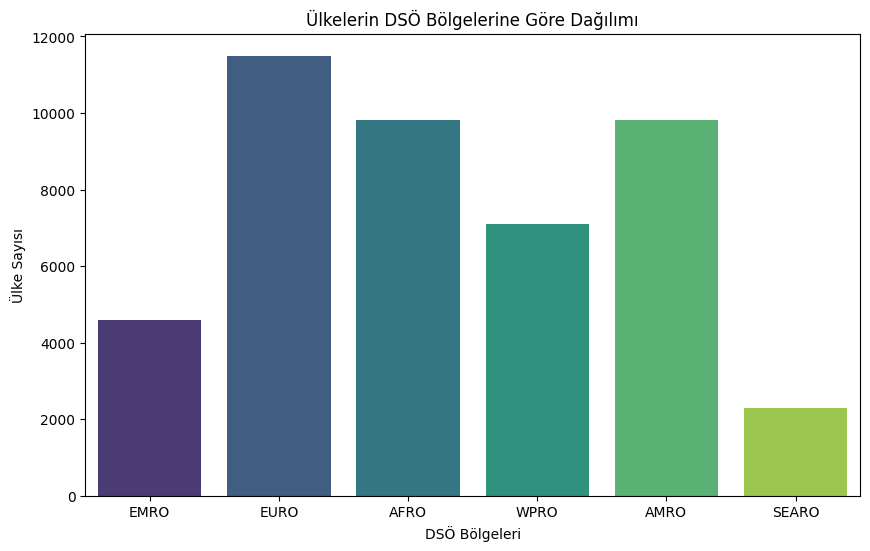

In [19]:
# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
sns.countplot(x='WHO_region', data=df, palette='viridis', hue='WHO_region')
plt.title('Ülkelerin DSÖ Bölgelerine Göre Dağılımı')
plt.xlabel('DSÖ Bölgeleri')
plt.ylabel('Ülke Sayısı')
plt.show()

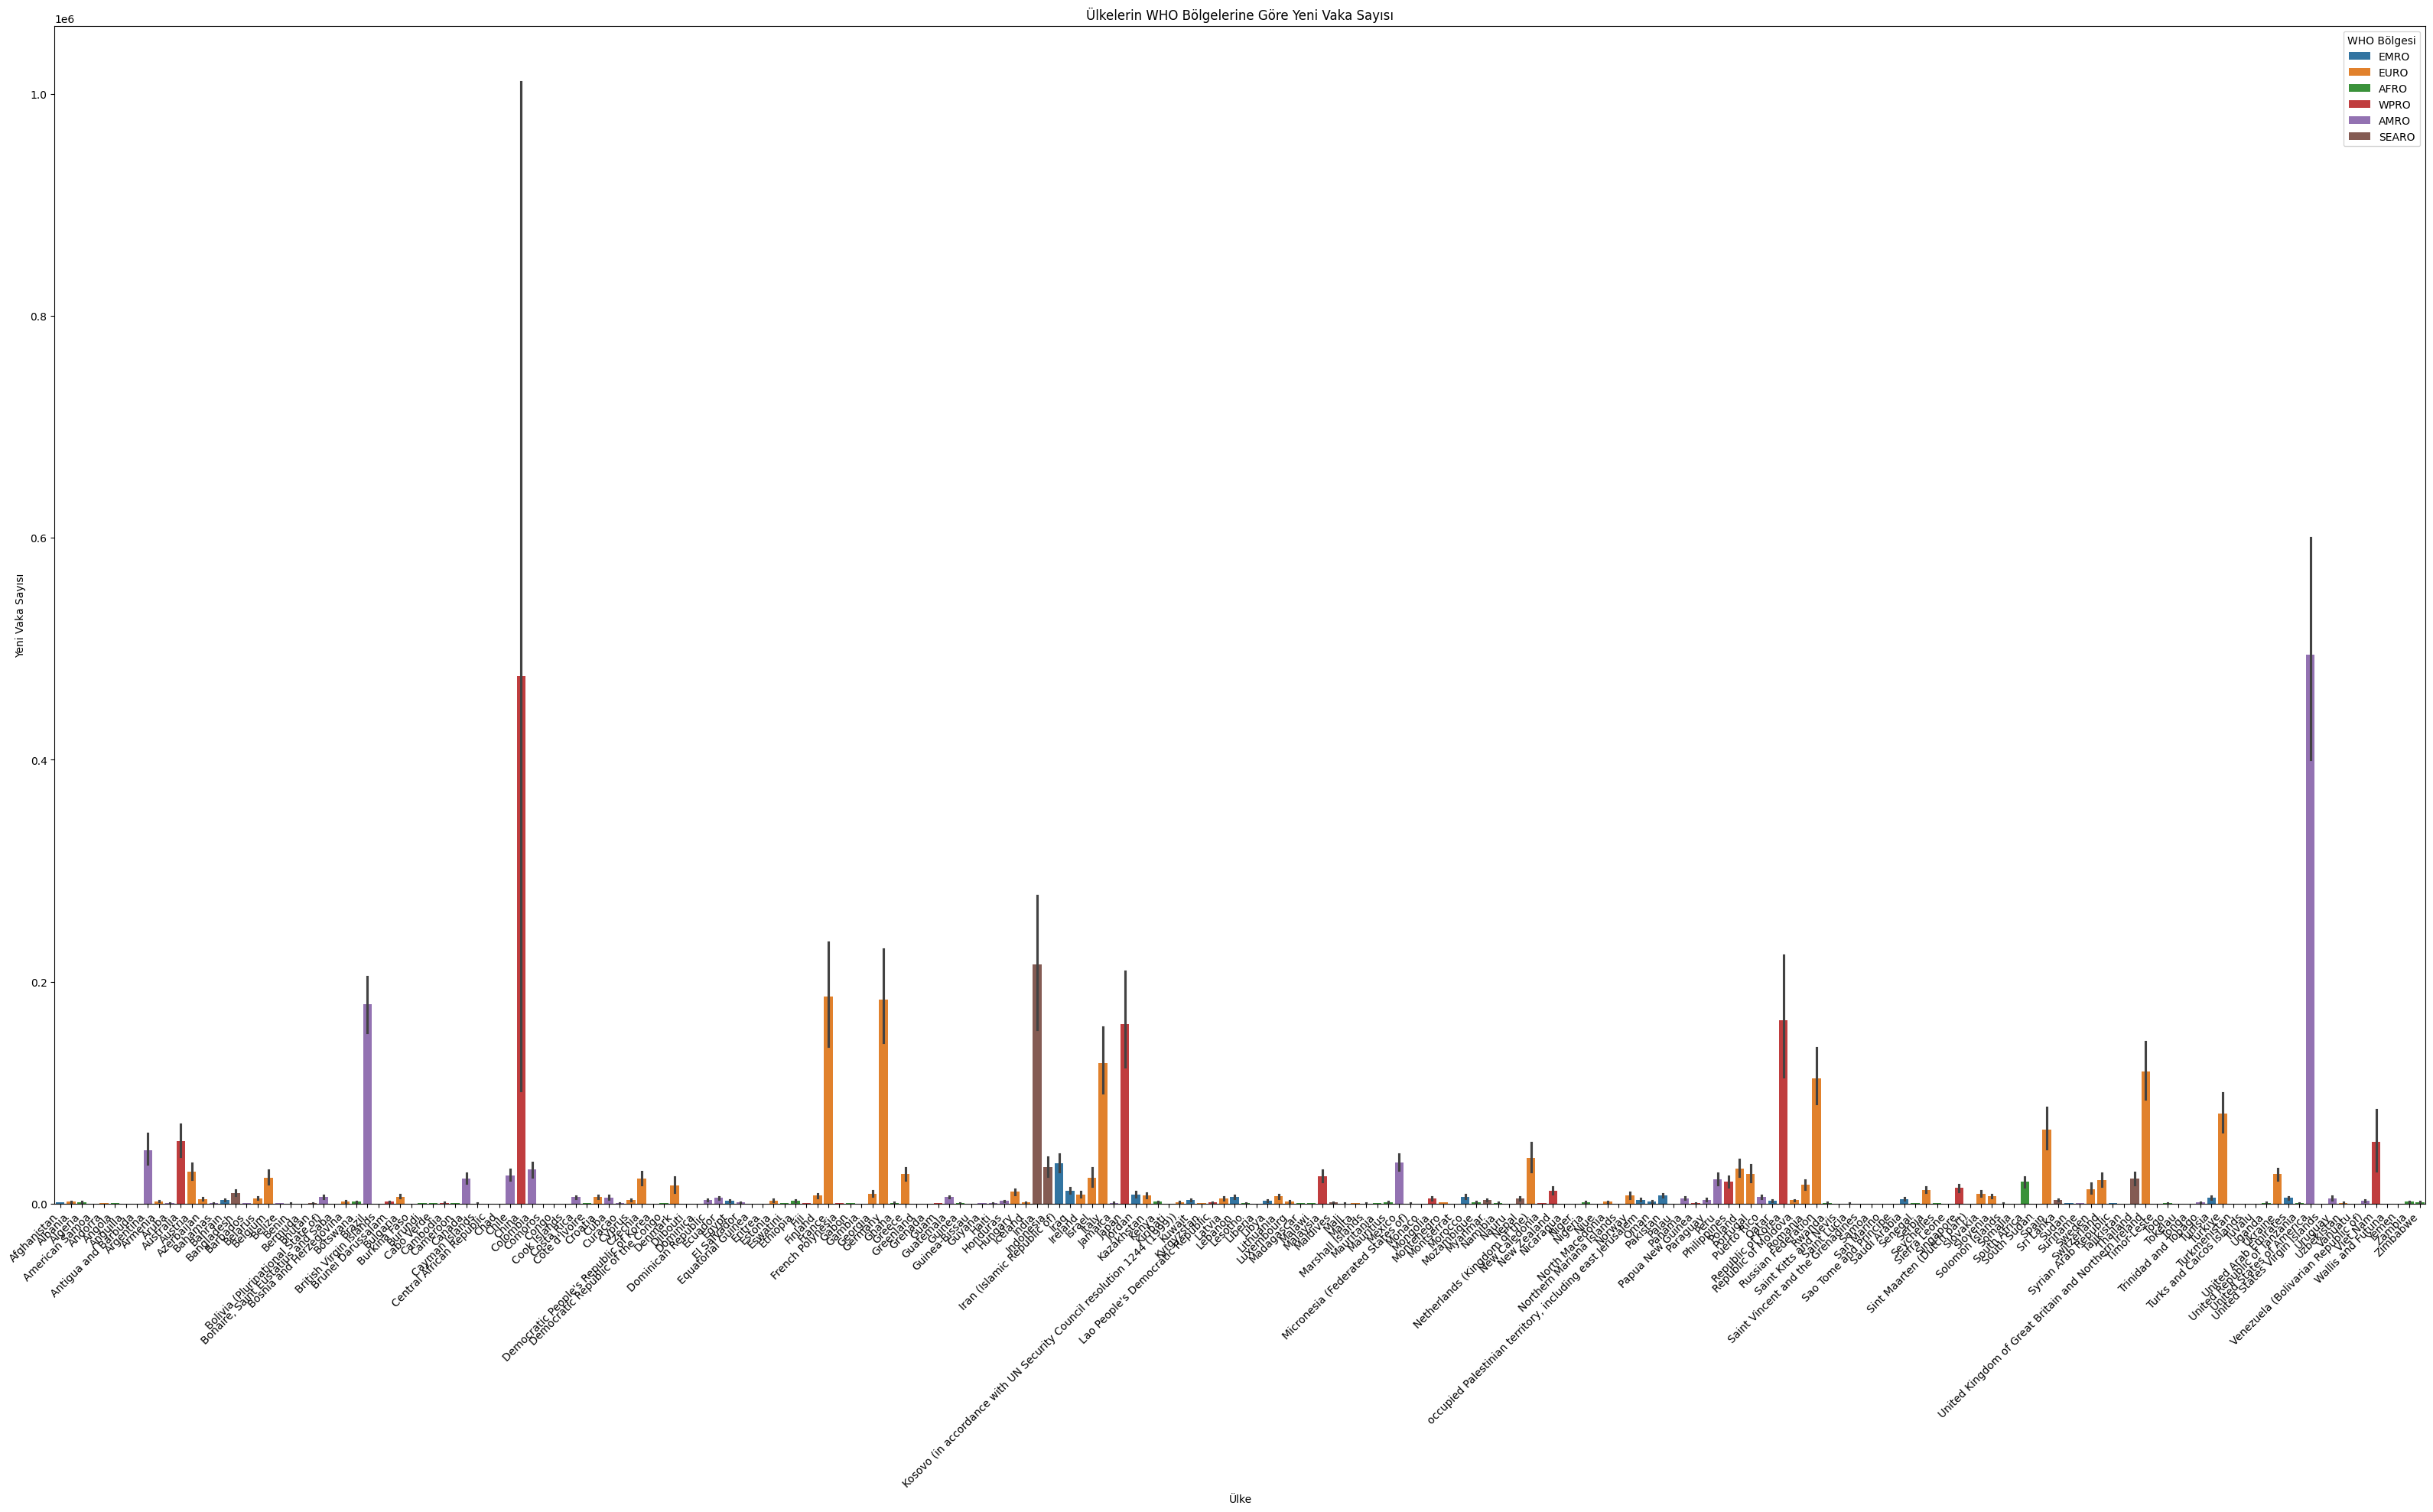

In [432]:
# Çubuk grafik kullanarak her ülkenin WHO bölgesine göre New_cases değerini göster
plt.figure(figsize=(40, 20))
sns.barplot(x='Country', y='New_cases', hue='WHO_region', data=df)

# x eksenindeki ülke etiketlerini 45 derece sola yatık yap
plt.xticks(rotation=45, ha='right')

plt.title('Ülkelerin WHO Bölgelerine Göre Yeni Vaka Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Yeni Vaka Sayısı')
plt.legend(title='WHO Bölgesi', loc='upper right')
plt.show()

In [409]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

Text(0.5, 1.0, 'Günlük Yeni Vakalar')

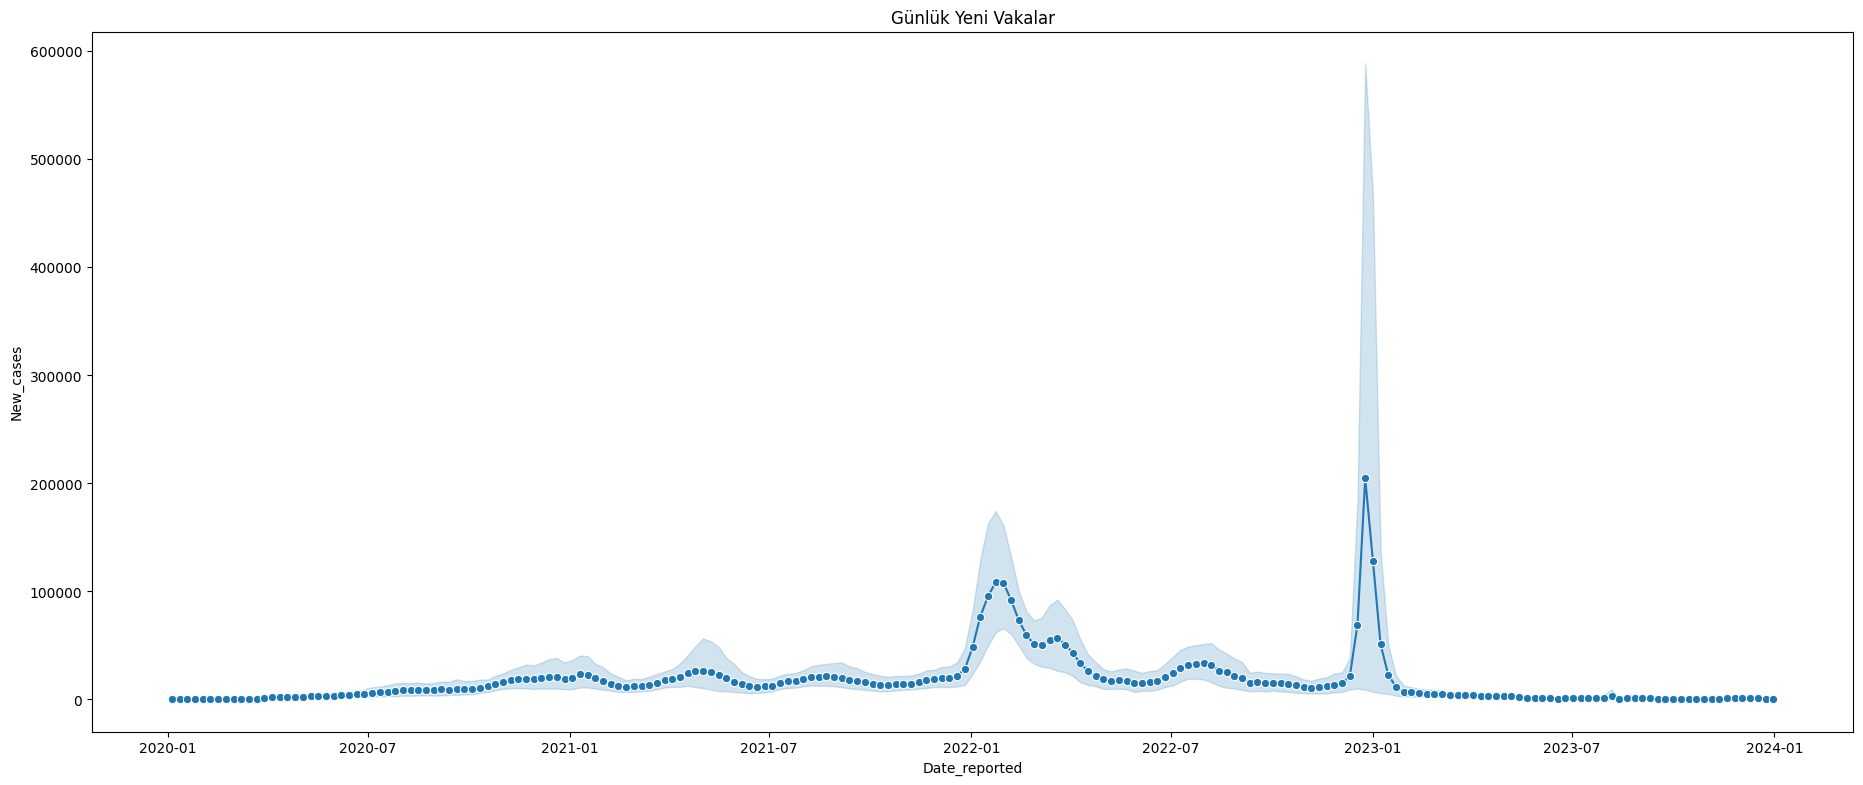

In [410]:
# Günlük yeni vakaların grafiği
plt.figure(figsize=(50, 20))
plt.subplot(2, 2, 1)
sns.lineplot(x='Date_reported', y='New_cases', data=df, marker='o')
plt.title('Günlük Yeni Vakalar')

Text(0.5, 1.0, 'Kumulatif Vakalar')

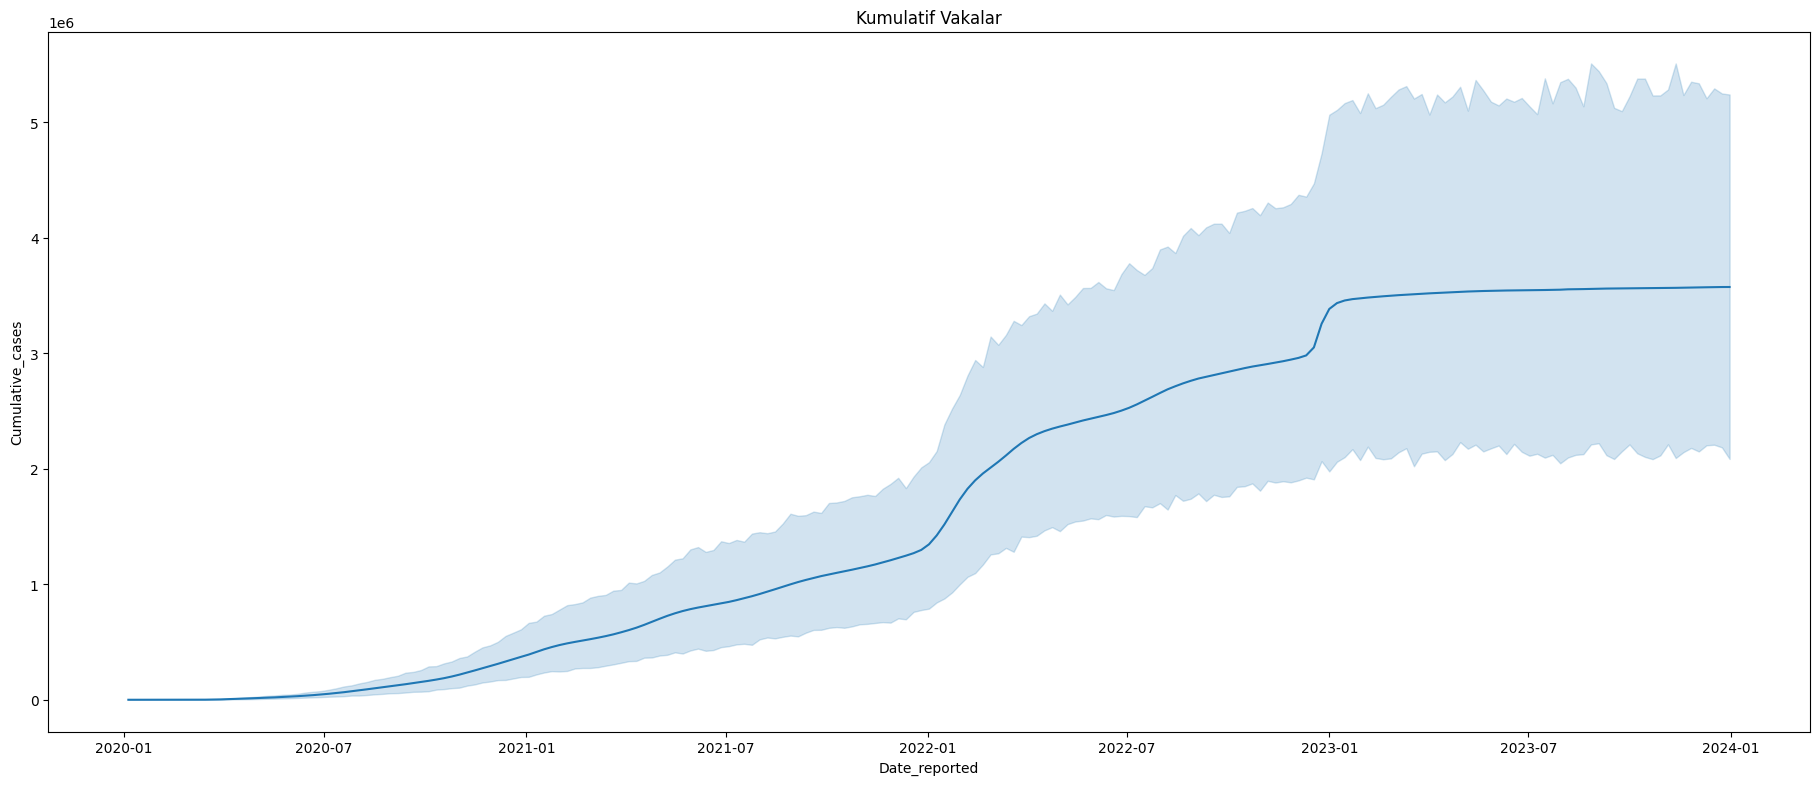

In [299]:
# Kumulatif vakaların grafiği
plt.figure(figsize=(50, 20))
plt.subplot(2, 2, 2)
sns.lineplot(x='Date_reported', y='Cumulative_cases', data=df)
plt.title('Kumulatif Vakalar')

Text(0.5, 1.0, 'Günlük Yeni Ölümler')

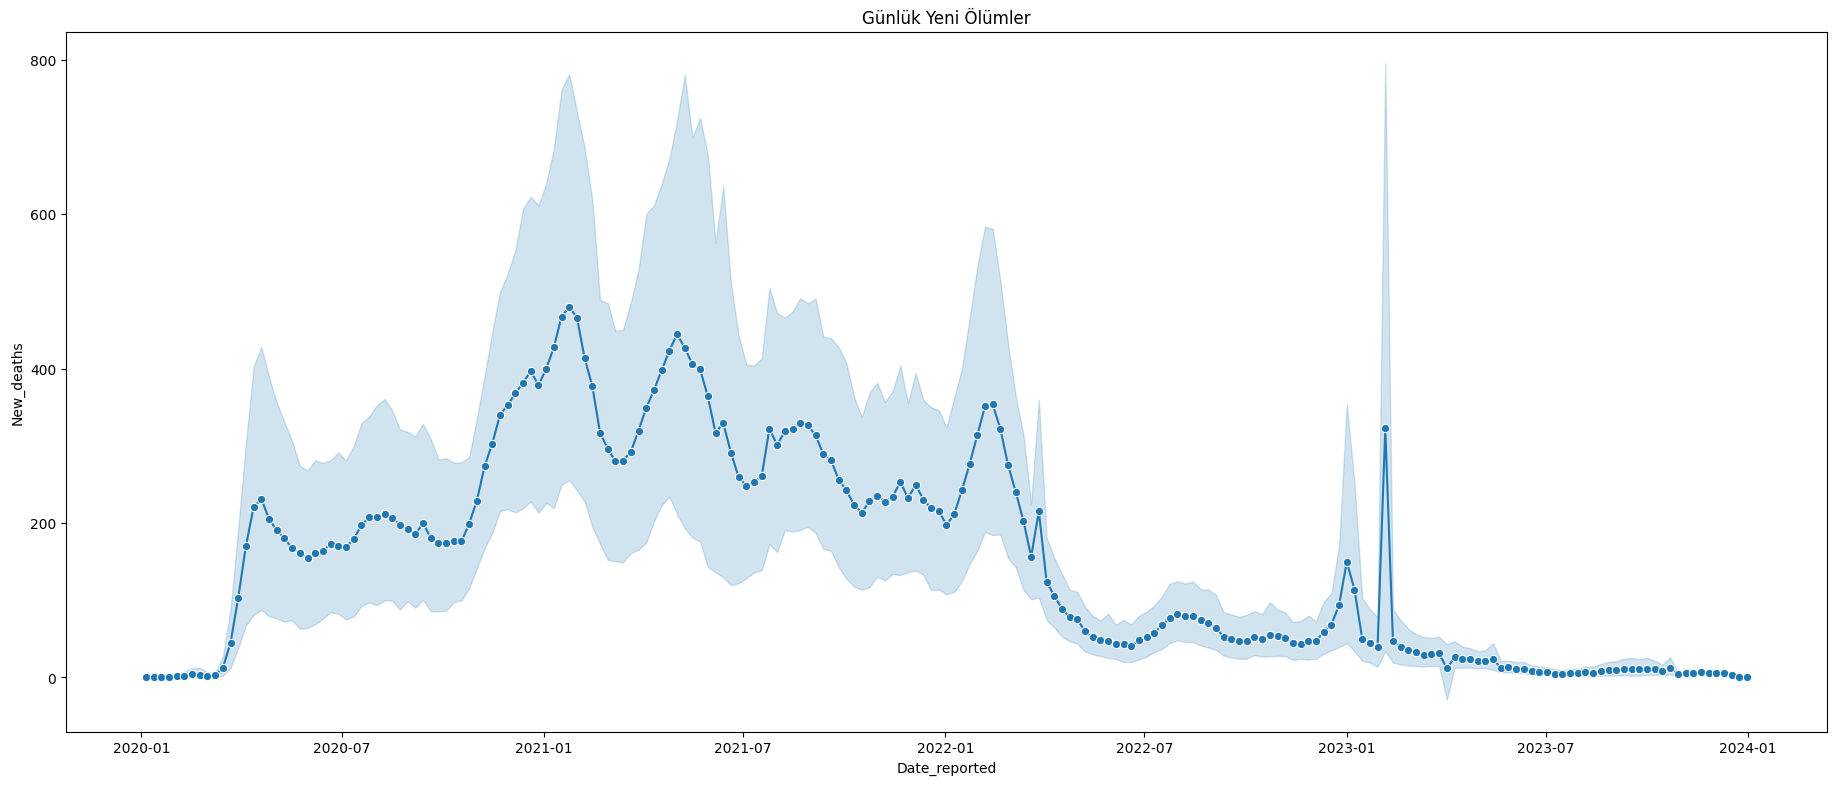

In [300]:
# Günlük yeni ölümlerin grafiği
plt.figure(figsize=(50, 20))
plt.subplot(2, 2, 3)
sns.lineplot(x='Date_reported', y='New_deaths', data=df, marker='o')
plt.title('Günlük Yeni Ölümler')

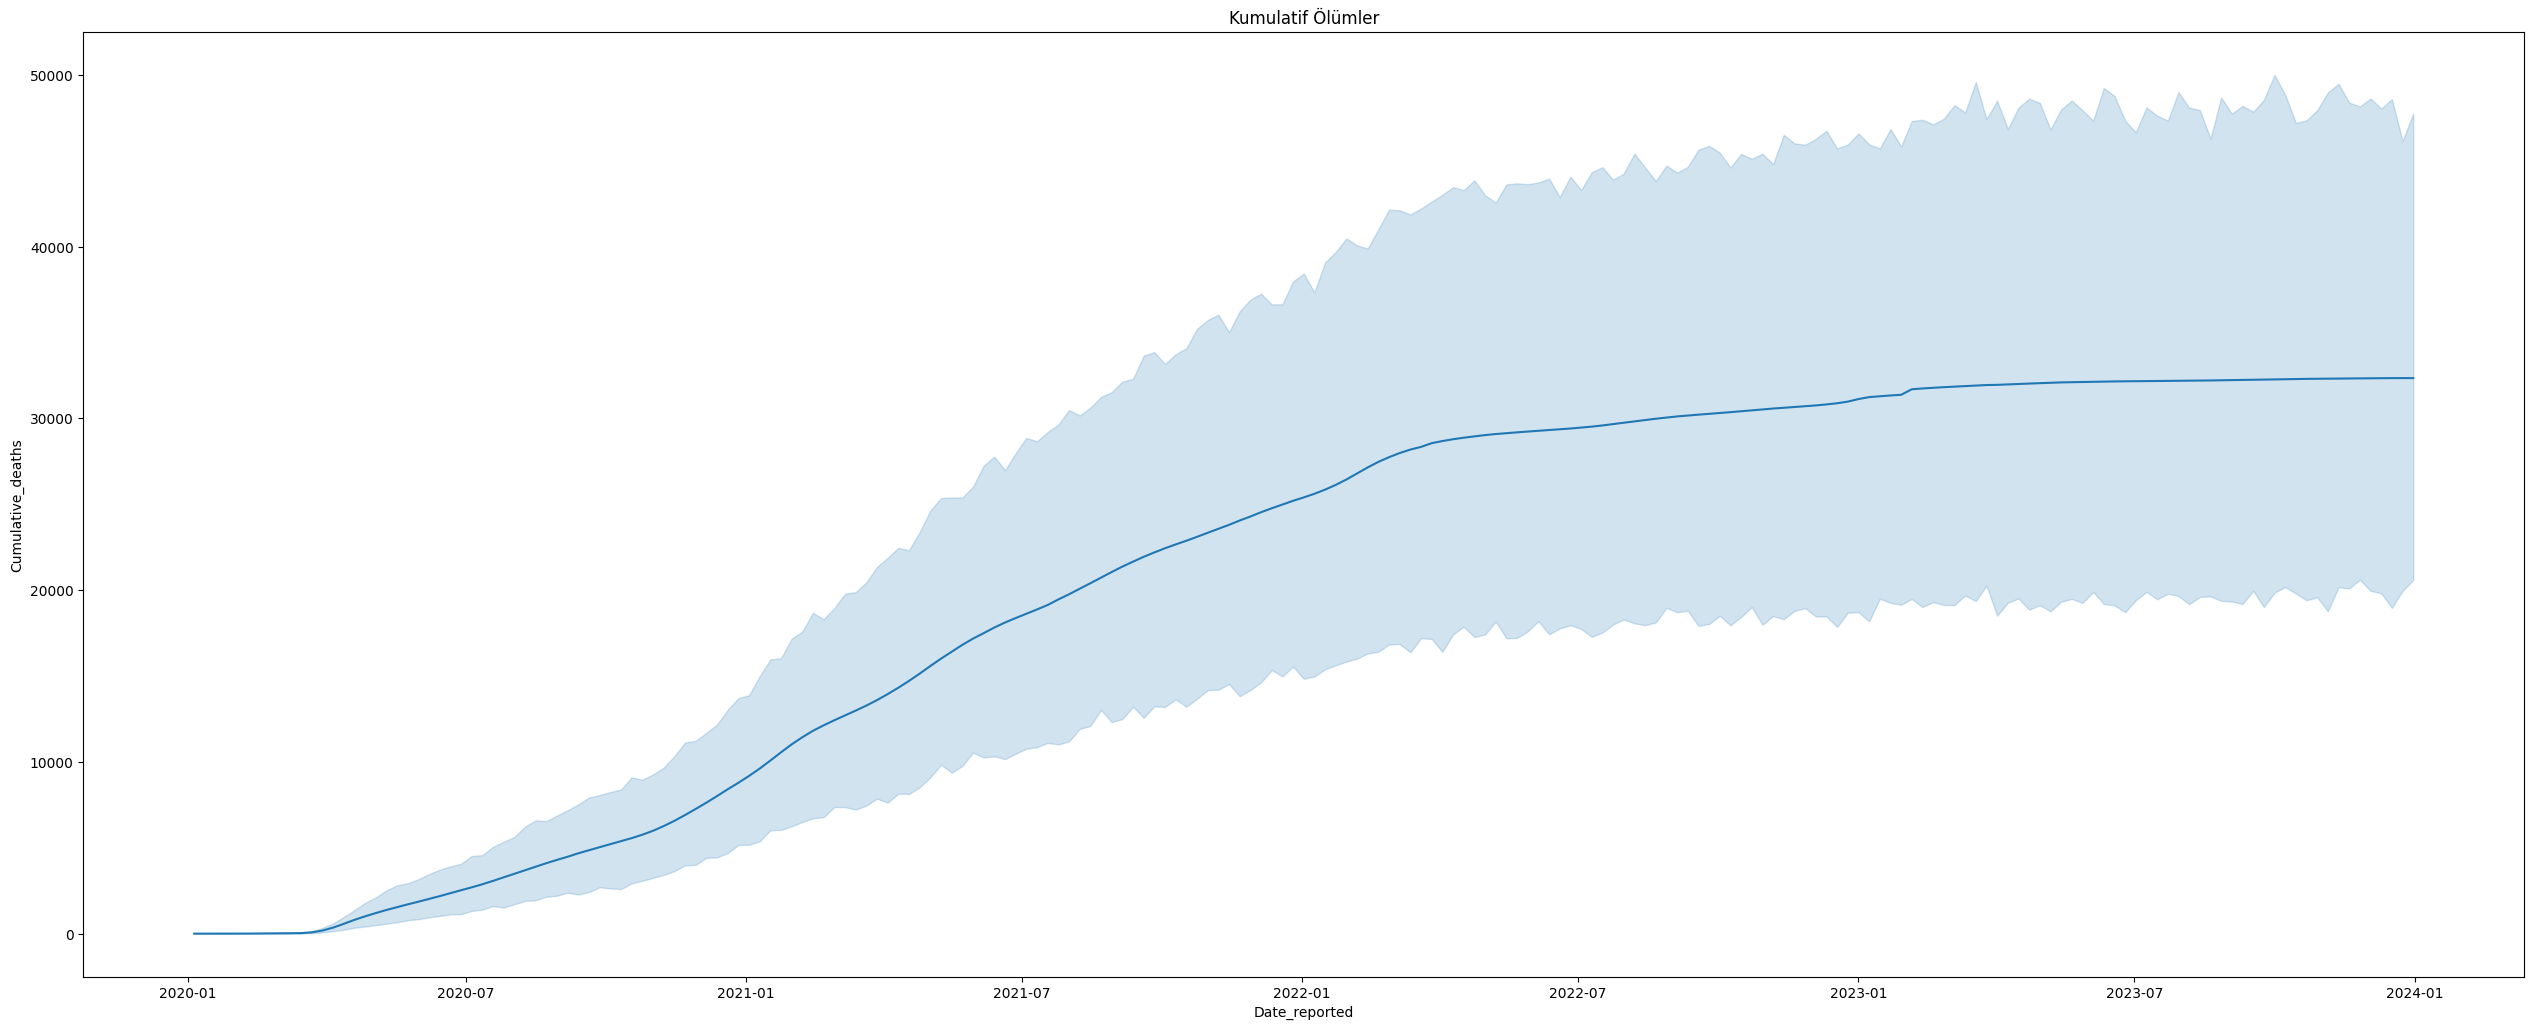

In [303]:
# Kumulatif ölümlerin grafiği
plt.figure(figsize=(50, 20))
plt.subplot(2, 2, 4)
sns.lineplot(x='Date_reported', y='Cumulative_deaths', data=df)
plt.title('Kumulatif Ölümler')

plt.tight_layout()
plt.show()